# AutoML

<!--<badge>--><a href="https://colab.research.google.com/github/kuennethgroup/ml_in_ms_wt24/blob/main/wt_25_ml_in_ms/08_ex/autoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

1. Prepare data
1. We train a AutoML model using this dataset

In [1]:
import pandas as pd

df_ = pd.read_json(
    "https://raw.githubusercontent.com/kuennethgroup/materials_datasets/refs/heads/main/polymer_tendency_to_crystalize/polymers_tend_to_crystalize.json"
)
# ... and easy-peasy
df_

,smiles,property,value,fingerprint
0,[*]C[*],Xc,47.80,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,[*]CC([*])C,Xc,44.47,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,[*]CC([*])CC,Xc,34.04,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,[*]CC([*])CCC,Xc,20.01,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,[*]CC([*])CC(C)C,Xc,21.64,"[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
427,[*]C([*])(F)F,Xc,31.84,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
428,[*]C/C=C\C[*],Xc,25.58,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
429,[*]O[Si](C)(C)CCCC(=O)Oc1ccc(C=Nc2ccc(N=Cc3ccc...,Xc,29.05,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
430,[*]O[Si](C)(C)CCCC(=O)Oc1ccc(C=Nc2ccc(Cc3ccc(N...,Xc,21.74,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


In [2]:
# !pip install scikit-learn autogluon

## Prepare data

In [3]:
df_ = df_.drop(columns=["property", "smiles"])
df_

,value,fingerprint
0,47.80,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,44.47,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,34.04,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,20.01,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,21.64,"[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
427,31.84,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
428,25.58,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
429,29.05,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
430,21.74,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


In [4]:
import numpy as np


df = df_["value"].to_frame()
df = pd.concat((df, pd.DataFrame(np.vstack(df_["fingerprint"]))), axis=1)
df

,value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,47.80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44.47,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34.04,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.01,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21.64,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,31.84,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
428,25.58,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
429,29.05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
430,21.74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.20, random_state=42)
len(df), len(df_train), len(df_test)

(432, 345, 87)

In [6]:
from autogluon.tabular import TabularDataset, TabularPredictor

train_data = TabularDataset(df_train)
display(train_data)

test_data = TabularDataset(df_test)
test_data

,value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
132,57.620000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231,28.370000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,21.610000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,79.990000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0.370000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,29.770000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,21.110000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,8.900000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348,12.490000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


,value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
424,8.380000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,72.530000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,53.050000,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
30,16.730000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
392,38.130000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,62.840000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,88.390000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,12.637895,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,37.020000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
predictor = TabularPredictor(
    label="value",
    problem_type="regression",
).fit(train_data, time_limit=200, presets="high_quality")

# presets at https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets

No path specified. Models will be saved in: "AutogluonModels/ag-20250108_095935"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Wed Dec 18 17:59:53 UTC 2024
CPU Count:          192
Memory Avail:       992.77 GB / 1007.45 GB (98.5%)
Disk Space Avail:   1483.10 GB / 7096.34 GB (20.9%)
Presets specified: ['high_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
DyStack is enab

(_ray_fit pid=231062) [1000]	valid_set's rmse: 13.4164


(_dystack pid=209618) 	-18.6573	 = Validation score   (-root_mean_squared_error)
(_dystack pid=209618) 	1.06s	 = Training   runtime
(_dystack pid=209618) 	0.03s	 = Validation runtime
(_dystack pid=209618) Fitting model: LightGBM_BAG_L1 ... Training model for up to 26.50s of the 41.33s of remaining time.
(_dystack pid=209618) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=24, gpus=0, memory=0.02%)
(_dystack pid=209618) 	-19.1182	 = Validation score   (-root_mean_squared_error)
(_dystack pid=209618) 	1.01s	 = Training   runtime
(_dystack pid=209618) 	0.03s	 = Validation runtime
(_dystack pid=209618) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 24.19s of the 39.03s of remaining time.
(_dystack pid=209618) 	-19.3923	 = Validation score   (-root_mean_squared_error)
(_dystack pid=209618) 	0.68s	 = Training   runtime
(_dystack pid=209618) 	0.09s	 = Validation runtime
(_dystack pid=209618) Fitting model: CatBoos

(_ray_fit pid=244999) [1000]	valid_set's rmse: 16.6547


(_dystack pid=209618) 	-18.1495	 = Validation score   (-root_mean_squared_error)
(_dystack pid=209618) 	0.93s	 = Training   runtime
(_dystack pid=209618) 	0.04s	 = Validation runtime
(_dystack pid=209618) Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 9.57s of the 9.55s of remaining time.
(_dystack pid=209618) 	-18.5531	 = Validation score   (-root_mean_squared_error)
(_dystack pid=209618) 	0.56s	 = Training   runtime
(_dystack pid=209618) 	0.12s	 = Validation runtime
(_dystack pid=209618) Fitting model: CatBoost_BAG_L2 ... Training model for up to 8.75s of the 8.73s of remaining time.
(_ray_fit pid=241241) 	Ran out of time, stopping training early. (Stopping on epoch 286)
(_dystack pid=209618) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=24, gpus=0, memory=0.03%)
(_dystack pid=209618) 	-18.0756	 = Validation score   (-root_mean_squared_error)
(_dystack pid=209618) 	2.19s	 = Training   runtime
(_dystack 

Text(0.5, 0, 'pred')

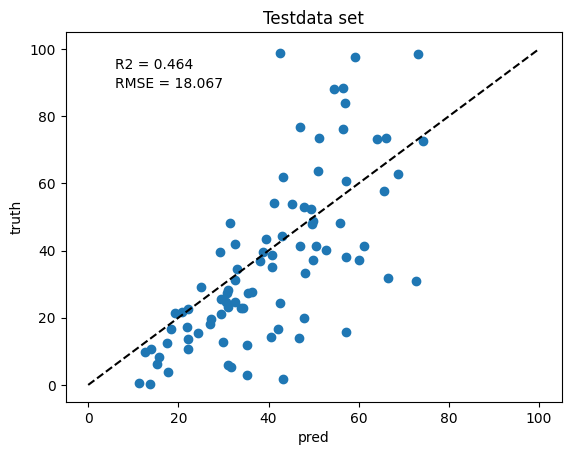

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, r2_score

fig, ax = plt.subplots()

y_pred = predictor.predict(test_data.drop(columns=["value"]))


rmse = root_mean_squared_error(test_data["value"], y_pred)
r2 = r2_score(test_data["value"], y_pred)


ax.plot(y_pred, test_data["value"], "o")
ax.plot([0, 100], [0, 100], "k--")
ax.text(0.1, 0.9, f"R2 = {r2:.3f}", transform=ax.transAxes)
ax.text(0.1, 0.85, f"RMSE = {rmse:.3f}", transform=ax.transAxes)
ax.set_title("Testdata set")
ax.set_ylabel("truth")
ax.set_xlabel("pred")

In [9]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2_FULL,-18.067172,NaN,root_mean_squared_error,0.218737,NaN,8.837717,0.002305,NaN,0.009048,2,True,50
1,XGBoost_r33_BAG_L1_FULL,-18.543248,NaN,root_mean_squared_error,0.039796,NaN,1.377994,0.039796,NaN,1.377994,1,True,44
2,LightGBM_r131_BAG_L1_FULL,-18.559354,NaN,root_mean_squared_error,0.023207,NaN,1.733645,0.023207,NaN,1.733645,1,True,39
3,CatBoost_r9_BAG_L1_FULL,-18.586058,NaN,root_mean_squared_error,0.033301,NaN,1.737180,0.033301,NaN,1.737180,1,True,41
4,LightGBM_BAG_L1_FULL,-18.646686,NaN,root_mean_squared_error,0.023527,NaN,0.655856,0.023527,NaN,0.655856,1,True,29
5,CatBoost_BAG_L1_FULL,-18.655791,NaN,root_mean_squared_error,0.032476,NaN,2.463821,0.032476,NaN,2.463821,1,True,31
6,NeuralNetTorch_r22_BAG_L1_FULL,-18.678836,NaN,root_mean_squared_error,0.123261,NaN,5.909173,0.123261,NaN,5.909173,1,True,43
7,ExtraTrees_r42_BAG_L1_FULL,-18.708754,NaN,root_mean_squared_error,0.077383,0.094190,0.513573,0.077383,0.094190,0.513573,1,True,45
8,ExtraTrees_r42_BAG_L1,-18.708754,-19.107821,root_mean_squared_error,0.080207,0.094190,0.513573,0.080207,0.094190,0.513573,1,True,20
9,CatBoost_r13_BAG_L1_FULL,-18.738863,NaN,root_mean_squared_error,0.030625,NaN,9.305657,0.030625,NaN,9.305657,1,True,48
